# Análisis Exploratorio de Datos Financieros

Este notebook realiza un análisis exploratorio de datos financieros obtenidos de Yahoo Finance, incluyendo:
- Visualización de precios históricos
- Cálculo y visualización de indicadores técnicos
- Análisis de correlaciones entre diferentes activos
- Identificación de patrones en series temporales financieras

El objetivo es preparar los datos para su uso en modelos predictivos para trading.

## 1. Importación de Bibliotecas

In [2]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime, timedelta
import os
import warnings

# Para cálculos financieros
import talib as ta  # Requiere instalación separada: pip install TA-Lib
from sklearn.preprocessing import MinMaxScaler

# Configuración de visualización
import matplotlib.dates as mdates
plt.style.use('seaborn-v0_8-darkgrid')
sns.set(style='darkgrid', palette='muted', font_scale=1.2)
plt.rcParams['figure.figsize'] = (16, 8)
warnings.filterwarnings('ignore')

# Formato para fechas
date_format = mdates.DateFormatter('%Y-%m-%d')

## 2. Descarga de Datos Históricos

Obtendremos datos históricos para una selección de activos financieros:
- Índices principales (S&P 500, Dow Jones, NASDAQ)
- Grandes empresas tecnológicas (Apple, Microsoft, Google, etc.)
- ETFs importantes

In [3]:
# Definir los tickers a analizar
tickers = [
    # Índices principales
    "^GSPC",  # S&P 500
    "^DJI",   # Dow Jones
    "^IXIC",  # NASDAQ
    
    # Grandes tecnológicas
    "AAPL",   # Apple
    "MSFT",   # Microsoft
    "GOOGL",  # Alphabet (Google)
    "AMZN",   # Amazon
    "META",   # Meta (Facebook)
    "TSLA",   # Tesla
    
    # ETFs importantes
    "SPY",    # SPDR S&P 500 ETF
    "QQQ",    # Invesco QQQ (Nasdaq-100)
    "VTI",    # Vanguard Total Stock Market ETF
]

# Definir el rango de fechas (2 años de datos)
end_date = datetime.now()
start_date = end_date - timedelta(days=365 * 2)

# Función para descargar datos
def download_data(ticker_list, start, end):
    data_dict = {}
    
    for ticker in ticker_list:
        print(f"Descargando datos para {ticker}...")
        try:
            data = yf.download(ticker, start=start, end=end)
            if not data.empty:
                data_dict[ticker] = data
                print(f"  ✓ {len(data)} filas descargadas")
            else:
                print(f"  ✗ No se encontraron datos")
        except Exception as e:
            print(f"  ✗ Error: {str(e)}")
    
    return data_dict

# Descargar datos
data_dict = download_data(tickers, start_date, start_date + timedelta(days=30))

# Comprobar si el directorio de datos existe
if not os.path.exists('../data'):
    os.makedirs('../data')

# Guardar algunos ejemplos para futuras referencias
for ticker, data in list(data_dict.items())[:3]:  # Solo guardar 3 ejemplos
    data.to_csv(f"../data/{ticker.replace('^', '')}_sample.csv")

Descargando datos para ^GSPC...


[*********************100%***********************]  1 of 1 completed



  ✓ 22 filas descargadas
Descargando datos para ^DJI...


[*********************100%***********************]  1 of 1 completed



  ✓ 22 filas descargadas
Descargando datos para ^IXIC...


[*********************100%***********************]  1 of 1 completed



  ✓ 22 filas descargadas
Descargando datos para AAPL...


[*********************100%***********************]  1 of 1 completed



  ✓ 22 filas descargadas
Descargando datos para MSFT...


[*********************100%***********************]  1 of 1 completed



  ✓ 22 filas descargadas
Descargando datos para GOOGL...


[*********************100%***********************]  1 of 1 completed



  ✓ 22 filas descargadas
Descargando datos para AMZN...


[*********************100%***********************]  1 of 1 completed



  ✓ 22 filas descargadas
Descargando datos para META...


[*********************100%***********************]  1 of 1 completed



  ✓ 22 filas descargadas
Descargando datos para TSLA...


[*********************100%***********************]  1 of 1 completed



  ✓ 22 filas descargadas
Descargando datos para SPY...


[*********************100%***********************]  1 of 1 completed



  ✓ 22 filas descargadas
Descargando datos para QQQ...


[*********************100%***********************]  1 of 1 completed



  ✓ 22 filas descargadas
Descargando datos para VTI...


[*********************100%***********************]  1 of 1 completed

  ✓ 22 filas descargadas


## 3. Exploración de Datos

Realizaremos un análisis exploratorio básico de los datos descargados para entender su estructura y características.

In [4]:
# Seleccionar un ticker para análisis detallado (usaremos S&P 500)
ticker_example = "^GSPC"
if ticker_example in data_dict:
    df = data_dict[ticker_example]
    
    # Información básica del DataFrame
    print(f"Datos para {ticker_example} (S&P 500):")
    print(f"Período: {df.index[0].strftime('%Y-%m-%d')} a {df.index[-1].strftime('%Y-%m-%d')}")
    print(f"Número de días de trading: {len(df)}")
    print("\nPrimeras filas:")
    display(df.head())
    
    # Estadísticas descriptivas
    print("\nEstadísticas descriptivas:")
    display(df.describe())
    
    # Verificar valores nulos
    print("\nValores nulos por columna:")
    display(df.isnull().sum())
else:
    print(f"No se encontraron datos para {ticker_example}")

Datos para ^GSPC (S&P 500):
Período: 2023-08-30 a 2023-09-29
Número de días de trading: 22

Primeras filas:


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2023-08-30,4514.870117,4521.649902,4493.589844,4500.339844,3064110000
2023-08-31,4507.660156,4532.259766,4507.390137,4517.009766,3946360000
2023-09-01,4515.770020,4541.250000,4501.350098,4530.600098,3246260000
2023-09-05,4496.830078,4514.290039,4496.009766,4510.060059,3526250000
2023-09-06,4465.479980,4490.350098,4442.379883,4490.350098,3418850000



Estadísticas descriptivas:


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
count,22.000000,22.000000,22.000000,22.000000,2.200000e+01
mean,4418.383190,4441.033137,4403.454967,4427.285423,3.658793e+09
std,85.714514,80.704075,88.713264,82.847592,7.733670e+08
min,4273.529785,4292.069824,4238.629883,4269.649902,3.064110e+09
25%,4331.859985,4361.974976,4319.660156,4349.895142,3.318730e+09
50%,4452.334961,4469.944824,4442.244873,4452.054932,3.499295e+09
75%,4482.454956,4496.177490,4465.125122,4489.707520,3.738405e+09
max,4515.770020,4541.250000,4507.390137,4530.600098,6.932230e+09



Valores nulos por columna:


Price   Ticker
Close   ^GSPC     0
High    ^GSPC     0
Low     ^GSPC     0
Open    ^GSPC     0
Volume  ^GSPC     0
dtype: int64

## 4. Visualización de Precios Históricos

Visualizaremos los precios históricos para entender las tendencias y patrones en los datos.

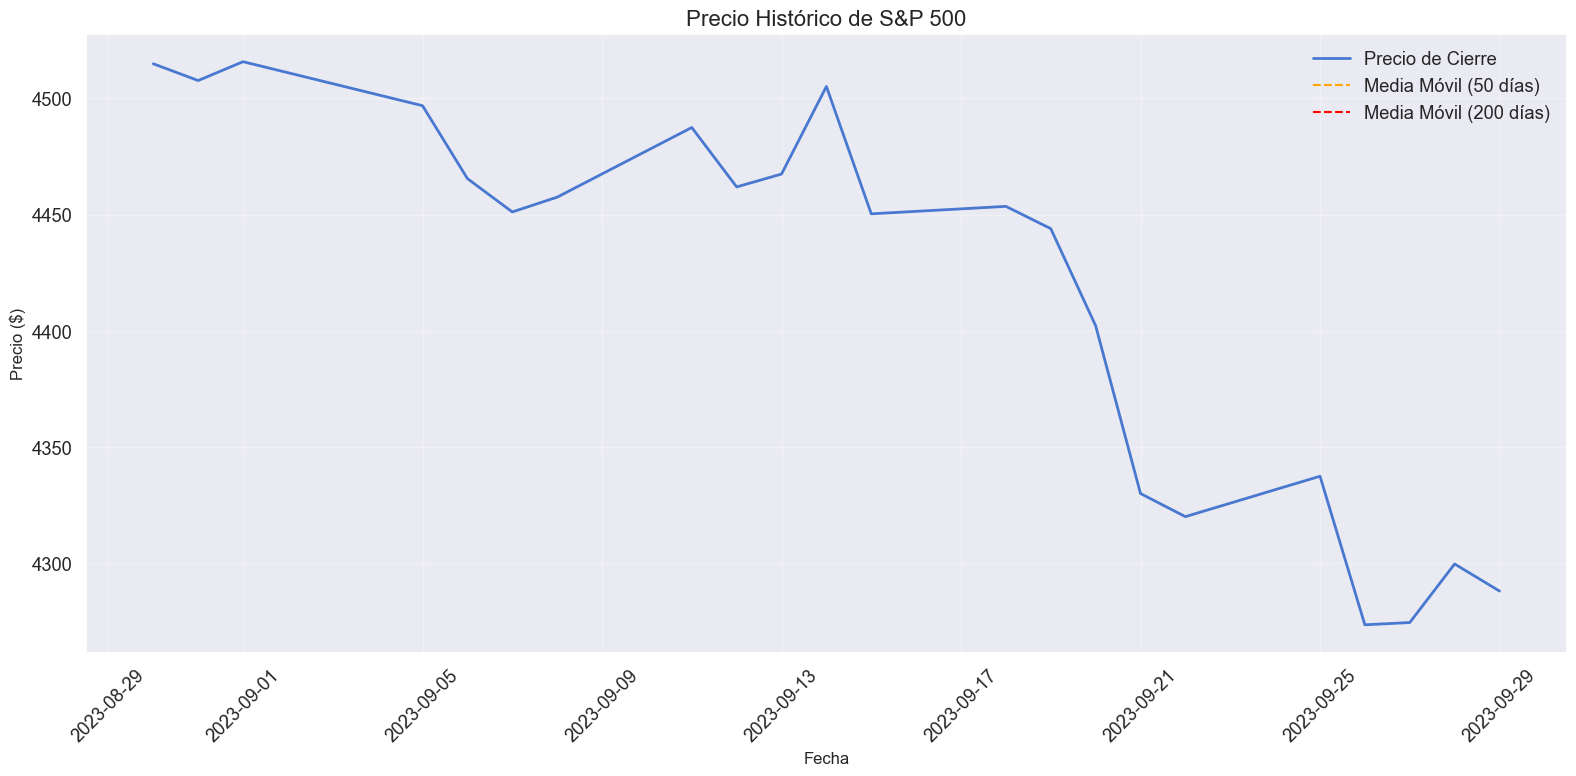

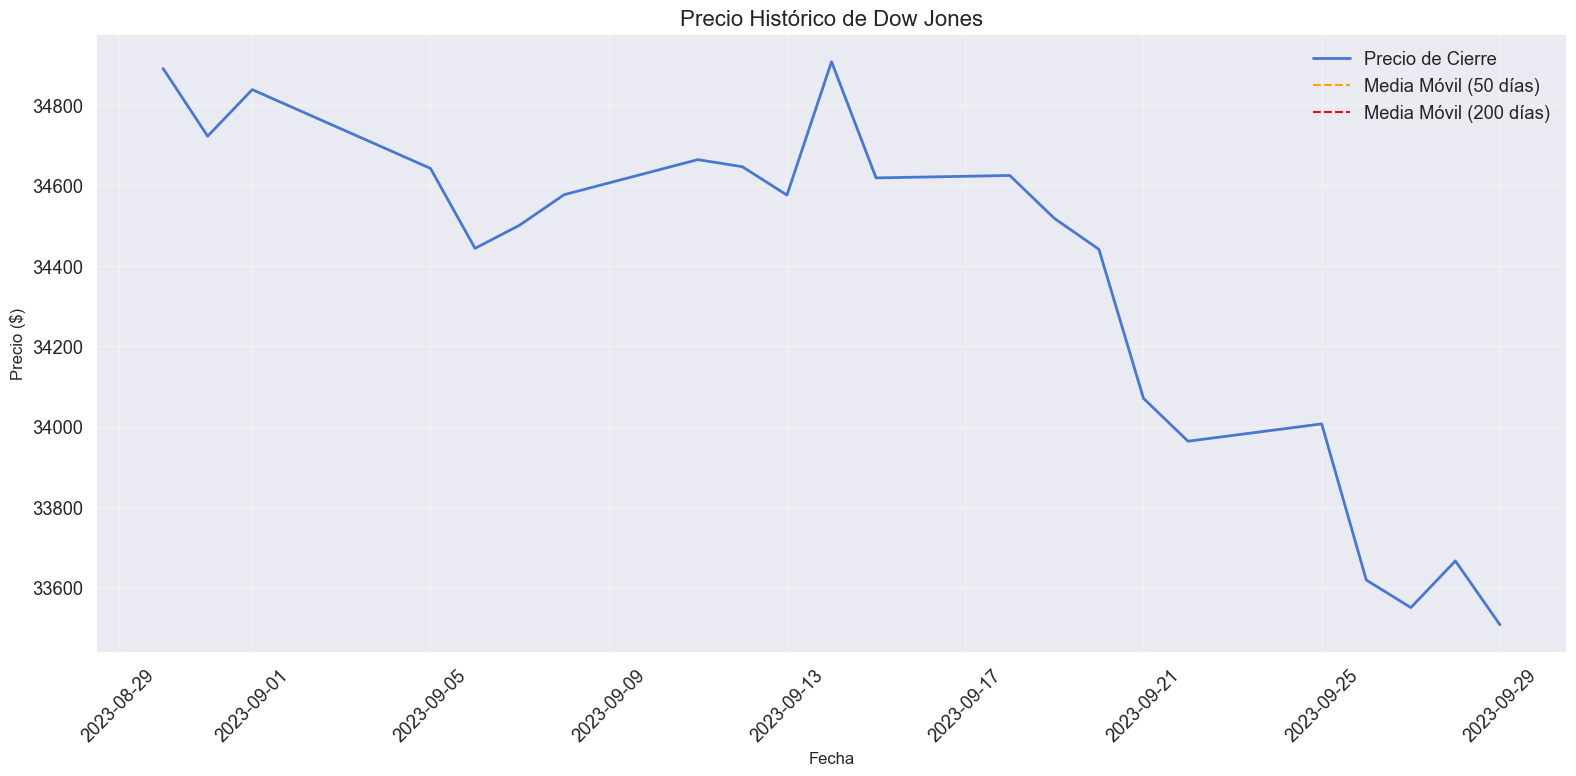

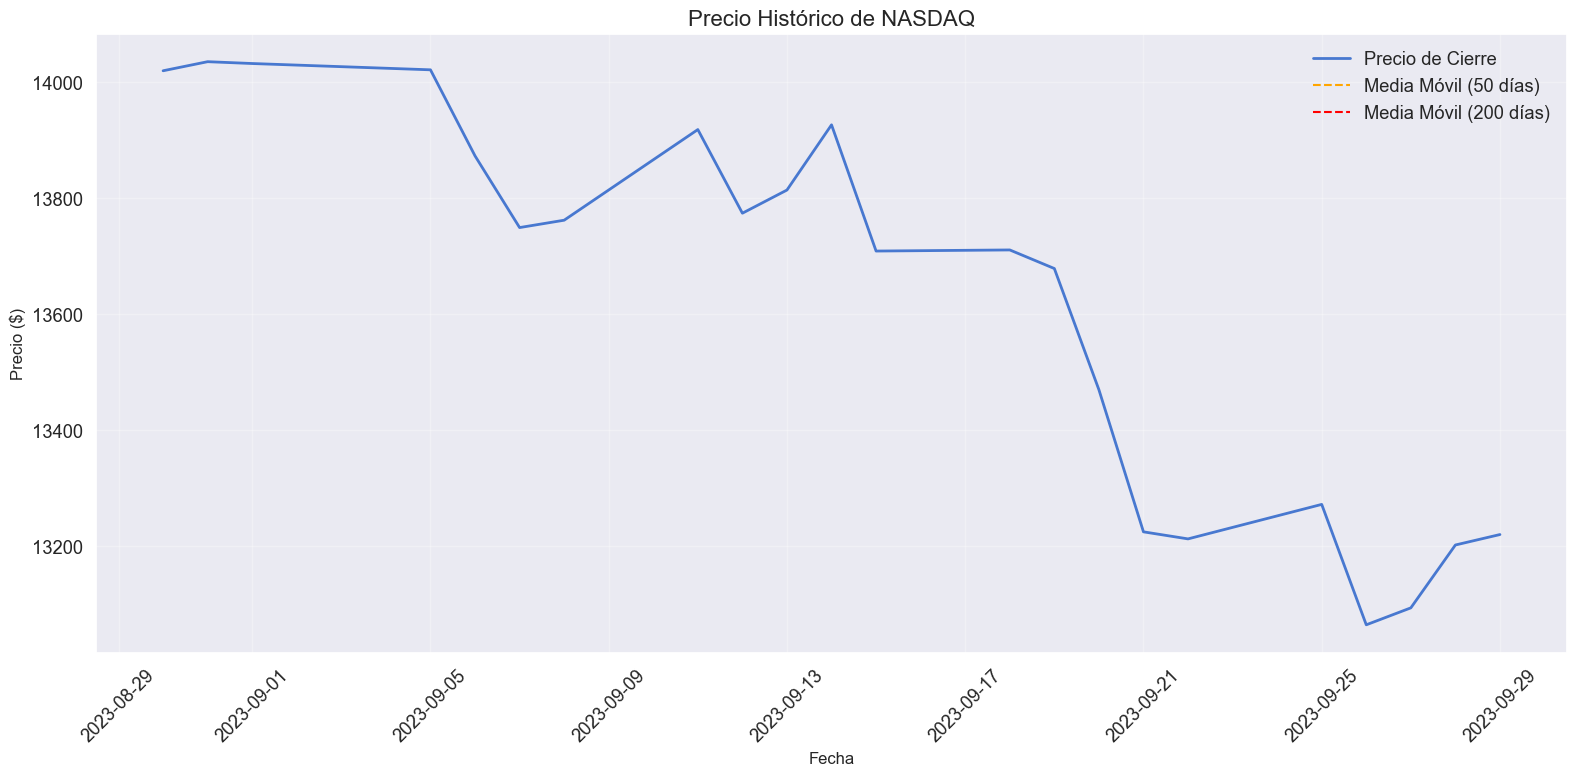

In [5]:
# Función para graficar precios
def plot_price_history(data, ticker_name, title=None):
    fig, ax = plt.subplots(figsize=(16, 8))
    
    # Graficar precio de cierre
    ax.plot(data.index, data['Close'], linewidth=2, label='Precio de Cierre')
    
    # Agregar promedio móvil de 50 días
    data['MA50'] = data['Close'].rolling(window=50).mean()
    ax.plot(data.index, data['MA50'], linewidth=1.5, label='Media Móvil (50 días)', 
            linestyle='--', color='orange')
    
    # Agregar promedio móvil de 200 días
    data['MA200'] = data['Close'].rolling(window=200).mean()
    ax.plot(data.index, data['MA200'], linewidth=1.5, label='Media Móvil (200 días)', 
            linestyle='--', color='red')
    
    # Configurar el gráfico
    if title:
        ax.set_title(title, fontsize=16)
    else:
        ax.set_title(f'Precio Histórico de {ticker_name}', fontsize=16)
    
    ax.set_xlabel('Fecha', fontsize=12)
    ax.set_ylabel('Precio ($)', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend()
    
    # Formatear eje x para fechas
    ax.xaxis.set_major_formatter(date_format)
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    return fig

# Graficar para algunos ejemplos
for ticker in list(data_dict.keys())[:3]:  # Solo mostrar 3 ejemplos
    name = ticker.replace('^', '')  # Quitar ^ para índices
    if ticker in ["^GSPC", "^DJI", "^IXIC"]:
        names = {"^GSPC": "S&P 500", "^DJI": "Dow Jones", "^IXIC": "NASDAQ"}
        name = names[ticker]
    
    if ticker in data_dict:
        fig = plot_price_history(data_dict[ticker], name)
        plt.show()

## 5. Cálculo de Indicadores Técnicos

Calcularemos varios indicadores técnicos comúnmente utilizados en análisis financiero:
- RSI (Índice de Fuerza Relativa)
- MACD (Convergencia/Divergencia de Medias Móviles)
- Bandas de Bollinger
- Retornos diarios

In [7]:
# Función para calcular indicadores técnicos
def calculate_indicators(data):
    df = data.copy()
    
    # Retornos diarios
    df['Return'] = df['Close'].pct_change() * 100  # Porcentaje
    df['Log_Return'] = np.log(df['Close'] / df['Close'].shift(1)) * 100
    
    # Medias móviles
    df['SMA_5'] = df['Close'].rolling(window=5).mean()
    df['SMA_20'] = df['Close'].rolling(window=20).mean()
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()
    
    # RSI (14 días)
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI_14'] = 100 - (100 / (1 + rs))
    
    # MACD
    df['EMA_12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA_26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['MACD_Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    df['MACD_Hist'] = df['MACD'] - df['MACD_Signal']
    
    # Bandas de Bollinger (20 días, 2 desviaciones estándar)
    df['BB_Middle'] = df['Close'].rolling(window=20).mean()
    df['BB_Std'] = df['Close'].rolling(window=20).std()
    df['BB_Upper'] = df['BB_Middle'] + 2 * df['BB_Std']
    df['BB_Lower'] = df['BB_Middle'] - 2 * df['BB_Std']
    df['BB_Width'] = (df['BB_Upper'] - df['BB_Lower']) / df['BB_Middle']
    
    # Volatilidad (desviación estándar de los retornos en 20 días)
    df['Volatility_20'] = df['Log_Return'].rolling(window=20).std()
    
    # Volumen relativo
    df['Volume_SMA_20'] = df['Volume'].rolling(window=20).mean()
    df['Rel_Volume'] = df['Volume'] / df['Volume_SMA_20']
    
    return df.dropna()

# Calcular indicadores para un ejemplo (S&P 500)
ticker_example = "^GSPC"
if ticker_example in data_dict:
    df_indicators = calculate_indicators(data_dict[ticker_example])
    print("Indicadores técnicos calculados:")
    display(df_indicators.tail())

ValueError: Cannot set a DataFrame with multiple columns to the single column Rel_Volume

## 6. Visualización de Indicadores Técnicos

Visualizaremos los indicadores técnicos calculados para entender su comportamiento y relación con el precio.

In [ ]:
# Visualizar indicadores para S&P 500
if ticker_example in data_dict:
    df = df_indicators.copy()
    
    # Crear figura con subplots
    fig, axs = plt.subplots(4, 1, figsize=(16, 20), gridspec_kw={'height_ratios': [3, 1, 1, 1]})
    
    # 1. Precio y Bandas de Bollinger
    axs[0].plot(df.index, df['Close'], label='Precio de Cierre', color='blue', linewidth=1.5)
    axs[0].plot(df.index, df['BB_Upper'], label='Banda Superior', color='red', linestyle='--', alpha=0.7)
    axs[0].plot(df.index, df['BB_Middle'], label='Media Móvil (20 días)', color='green', linestyle='--', alpha=0.7)
    axs[0].plot(df.index, df['BB_Lower'], label='Banda Inferior', color='red', linestyle='--', alpha=0.7)
    axs[0].fill_between(df.index, df['BB_Upper'], df['BB_Lower'], color='gray', alpha=0.1)
    axs[0].set_title('S&P 500 con Bandas de Bollinger', fontsize=15)
    axs[0].set_ylabel('Precio ($)', fontsize=12)
    axs[0].legend(loc='upper left')
    axs[0].grid(True, alpha=0.3)
    
    # 2. Volumen
    axs[1].bar(df.index, df['Volume'], color='blue', alpha=0.7, label='Volumen')
    axs[1].plot(df.index, df['Volume_SMA_20'], color='red', linewidth=1.5, label='Media Móvil (20 días)')
    axs[1].set_ylabel('Volumen', fontsize=12)
    axs[1].legend(loc='upper left')
    axs[1].grid(True, alpha=0.3)
    
    # 3. RSI
    axs[2].plot(df.index, df['RSI_14'], color='purple', linewidth=1.5)
    axs[2].axhline(y=70, color='red', linestyle='--', alpha=0.7)
    axs[2].axhline(y=30, color='green', linestyle='--', alpha=0.7)
    axs[2].fill_between(df.index, df['RSI_14'], 70, where=(df['RSI_14'] >= 70), color='red', alpha=0.3)
    axs[2].fill_between(df.index, df['RSI_14'], 30, where=(df['RSI_14'] <= 30), color='green', alpha=0.3)
    axs[2].set_ylabel('RSI', fontsize=12)
    axs[2].set_ylim(0, 100)
    axs[2].grid(True, alpha=0.3)
    
    # 4. MACD
    axs[3].plot(df.index, df['MACD'], color='blue', linewidth=1.5, label='MACD')
    axs[3].plot(df.index, df['MACD_Signal'], color='red', linewidth=1.5, label='Señal')
    axs[3].bar(df.index, df['MACD_Hist'], color='green', alpha=0.5, label='Histograma')
    axs[3].axhline(y=0, color='black', linestyle='-', alpha=0.3)
    axs[3].set_ylabel('MACD', fontsize=12)
    axs[3].set_xlabel('Fecha', fontsize=12)
    axs[3].legend(loc='upper left')
    axs[3].grid(True, alpha=0.3)
    
    # Formatear eje x para fechas en todos los subplots
    for ax in axs:
        ax.xaxis.set_major_formatter(date_format)
    
    plt.tight_layout()
    plt.show()

## 7. Análisis de Correlación entre Activos

Analizaremos las correlaciones entre diferentes activos para entender sus relaciones y posibles oportunidades de diversificación.

In [ ]:
# Crear un DataFrame con los precios de cierre de todos los activos
close_prices = pd.DataFrame()

for ticker, data in data_dict.items():
    name = ticker.replace('^', '')  # Quitar ^ para índices
    if ticker in ["^GSPC", "^DJI", "^IXIC"]:
        names = {"^GSPC": "S&P_500", "^DJI": "Dow_Jones", "^IXIC": "NASDAQ"}
        name = names[ticker]
    close_prices[name] = data['Close']

# Calcular retornos diarios
returns = close_prices.pct_change().dropna()

# Calcular matriz de correlación
correlation = returns.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(14, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Retornos Diarios', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Análisis de correlaciones extremas
print("\nCorrelaciones más fuertes (positivas):")
corr_pairs = []
for i in range(len(correlation.columns)):
    for j in range(i+1, len(correlation.columns)):
        corr_pairs.append((correlation.columns[i], correlation.columns[j], correlation.iloc[i, j]))

# Ordenar por valor absoluto de correlación
corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

# Mostrar top 5 correlaciones más fuertes
for pair in corr_pairs[:5]:
    print(f"{pair[0]} vs {pair[1]}: {pair[2]:.4f}")

# Mostrar correlaciones más débiles
print("\nCorrelaciones más débiles:")
for pair in corr_pairs[-5:]:
    print(f"{pair[0]} vs {pair[1]}: {pair[2]:.4f}")

## 8. Preparación de Datos para Modelado

Crearemos un conjunto de datos estructurado para el modelado predictivo, transformando los datos en un formato adecuado para modelos de series temporales.

In [ ]:
# Seleccionar un activo para modelado (S&P 500)
ticker_model = "^GSPC"
if ticker_model in data_dict:
    # Calcular indicadores
    df_model = calculate_indicators(data_dict[ticker_model])
    
    # Seleccionar características relevantes
    features = [
        'Close', 'Volume', 'Return', 'SMA_5', 'SMA_20', 
        'RSI_14', 'MACD', 'MACD_Signal', 'MACD_Hist',
        'BB_Upper', 'BB_Lower', 'BB_Width', 'Volatility_20', 'Rel_Volume'
    ]
    
    df_features = df_model[features].copy()
    
    # Verificar valores nulos
    print("Valores nulos en el conjunto de datos:")
    display(df_features.isnull().sum())
    
    # Eliminar filas con valores nulos
    df_features = df_features.dropna()
    
    # Normalizar los datos
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df_features)
    
    # Crear un DataFrame con datos normalizados
    df_scaled = pd.DataFrame(scaled_data, columns=features, index=df_features.index)
    
    print("\nDatos normalizados:")
    display(df_scaled.head())
    
    # Función para crear secuencias para entrenamiento
    def create_sequences(data, sequence_length=60, target_col='Close'):
        X, y = [], []
        
        for i in range(len(data) - sequence_length):
            X.append(data.iloc[i:i+sequence_length].values)
            y.append(data.iloc[i+sequence_length][target_col])
            
        return np.array(X), np.array(y)
    
    # Definir longitud de secuencia
    seq_length = 20
    
    # Crear secuencias
    X, y = create_sequences(df_scaled, sequence_length=seq_length)
    
    print(f"\nConjunto de datos creado con secuencias de {seq_length} días:")
    print(f"X shape: {X.shape}")  # (muestras, seq_length, características)
    print(f"y shape: {y.shape}")  # (muestras,)
    
    # Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    print(f"\nConjunto de entrenamiento: {X_train.shape[0]} muestras")
    print(f"Conjunto de prueba: {X_test.shape[0]} muestras")
    
    # Guardar datos para uso posterior
    np.save('../data/X_train.npy', X_train)
    np.save('../data/y_train.npy', y_train)
    np.save('../data/X_test.npy', X_test)
    np.save('../data/y_test.npy', y_test)
    
    print("\nDatos preparados y guardados para modelado.")

## 9. Visualización de Patrones en los Datos

Visualizaremos algunos patrones específicos en los datos que podrían ser útiles para el modelado predictivo.

In [ ]:
# Visualizar la distribución de retornos
if ticker_model in data_dict:
    df = df_model.copy()
    
    # Crear figura con subplots
    fig, axs = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Distribución de retornos diarios
    sns.histplot(df['Return'].dropna(), kde=True, ax=axs[0, 0], color='blue')
    axs[0, 0].set_title('Distribución de Retornos Diarios (%)', fontsize=14)
    axs[0, 0].set_xlabel('Retorno (%)')
    axs[0, 0].set_ylabel('Frecuencia')
    
    # 2. QQ-Plot de retornos (verificar normalidad)
    from scipy import stats
    stats.probplot(df['Return'].dropna(), dist="norm", plot=axs[0, 1])
    axs[0, 1].set_title('QQ-Plot de Retornos Diarios', fontsize=14)
    
    # 3. Autocorrelación de retornos
    from pandas.plotting import autocorrelation_plot
    autocorrelation_plot(df['Return'].dropna(), ax=axs[1, 0])
    axs[1, 0].set_title('Autocorrelación de Retornos', fontsize=14)
    
    # 4. Volatilidad vs Retorno
    axs[1, 1].scatter(df['Volatility_20'], df['Return'], alpha=0.5, color='purple')
    axs[1, 1].set_title('Volatilidad vs Retorno', fontsize=14)
    axs[1, 1].set_xlabel('Volatilidad (20 días)')
    axs[1, 1].set_ylabel('Retorno (%)')
    
    plt.tight_layout()
    plt.show()
    
    # Graficar la relación entre volumen y retorno
    plt.figure(figsize=(14, 7))
    plt.scatter(df['Rel_Volume'], df['Return'], alpha=0.5, color='green')
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Relación entre Volumen Relativo y Retorno', fontsize=15)
    plt.xlabel('Volumen Relativo (actual / promedio 20 días)')
    plt.ylabel('Retorno (%)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

## 10. Conclusiones y Próximos Pasos

Basándonos en el análisis exploratorio, podemos extraer algunas conclusiones importantes y definir los próximos pasos para el modelado predictivo.

### Conclusiones:

1. **Estructura de datos**: Los datos financieros muestran patrones temporales que pueden ser modelados mediante técnicas de series temporales como LSTM o GRU.

2. **Indicadores técnicos**: Hemos calculado una amplia gama de indicadores técnicos que pueden servir como características para nuestros modelos predictivos.

3. **Correlaciones**: Existe una fuerte correlación entre ciertos activos financieros, lo que puede ser útil para estrategias de diversificación o para predecir el movimiento de un activo basado en otros.

4. **Preparación de datos**: Hemos estructurado los datos en secuencias temporales adecuadas para modelos de aprendizaje profundo.

### Próximos Pasos:

1. **Modelado predictivo**: Desarrollar modelos de series temporales (LSTM, GRU, etc.) para predecir los precios futuros.

2. **Evaluación de modelos**: Implementar métricas adecuadas para evaluar el rendimiento de los modelos.

3. **Backtesting**: Realizar pruebas retrospectivas de estrategias de trading basadas en las predicciones.

4. **Optimización**: Ajustar hiperparámetros y seleccionar las mejores características para mejorar el rendimiento.

5. **Implementación**: Desarrollar un sistema automatizado para actualizar datos, reentrenar modelos y generar señales de trading.

Los datos preparados en este notebook servirán como base para la implementación de modelos predictivos en el proyecto de trading algorítmico.